In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
new_data_path = 'dataset.csv'
new_df = pd.read_csv(new_data_path)

new_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [174]:
data_types = new_df.dtypes
missing_values = new_df.isnull().sum()

data_types, missing_values

(Unnamed: 0            int64
 track_id             object
 artists              object
 album_name           object
 track_name           object
 popularity            int64
 duration_ms           int64
 explicit               bool
 danceability        float64
 energy              float64
 key                   int64
 loudness            float64
 mode                  int64
 speechiness         float64
 acousticness        float64
 instrumentalness    float64
 liveness            float64
 valence             float64
 tempo               float64
 time_signature        int64
 track_genre          object
 dtype: object,
 Unnamed: 0          0
 track_id            0
 artists             1
 album_name          1
 track_name          1
 popularity          0
 duration_ms         0
 explicit            0
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 livene

In [175]:
# Remove the row with missing essential information
new_df.dropna(subset=[ 'album_name', 'track_name'], inplace=True)

# Confirm removal and display updated information
print(new_df.isnull().sum())
new_df.head()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [176]:
# Remove the row with missing essential information
new_df.dropna(subset=['album_name', 'track_name'], inplace=True)
# Determine the top 10 most common genres and artists


top_artist = new_df['artists'].value_counts().head(30).index.tolist()

# Filter the dataframe to include only the top genres and top artists
new_df = new_df[new_df['artists'].isin(top_artist)]
# Remove the row with missing essential information

# Confirm removal and display updated information
missing_values_after_cleanup = new_df.isnull().sum()
new_df.head(), missing_values_after_cleanup

new_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2013,2013,6QvYmrqFKRSVrcVgvoA7Ar,Red Hot Chili Peppers,All That Really Matters - Just Hits,Tippa My Tongue,4,260808,False,0.573,0.913,...,-6.520,0,0.0409,0.00861,0.027300,0.114,0.795,88.418,4,alt-rock
2014,2014,75fT19n6ZQHr67Mkh86qfD,Red Hot Chili Peppers,Rock Brandneu,Tippa My Tongue,2,260808,False,0.573,0.913,...,-6.520,0,0.0409,0.00861,0.027300,0.114,0.795,88.418,4,alt-rock
2016,2016,2AEdT2ZKd14kzOouzdNOUj,Red Hot Chili Peppers,OK Boomers - Top Tunes,Californication,2,329733,False,0.592,0.765,...,-2.788,0,0.0270,0.00210,0.001540,0.127,0.327,96.483,4,alt-rock
2017,2017,4xnB2yGAeXOuR3kJ9KTD3b,Red Hot Chili Peppers,Rock Brandneu,Nerve Flip,0,186148,False,0.386,0.936,...,-4.005,1,0.0701,0.01210,0.000016,0.266,0.418,176.366,4,alt-rock
2019,2019,5xUhs6dlfkcxZM8zq7riYF,Red Hot Chili Peppers,Tek It - New Noise,Black Summer,1,232412,False,0.417,0.682,...,-5.071,1,0.0295,0.02670,0.000669,0.109,0.351,105.542,4,alt-rock


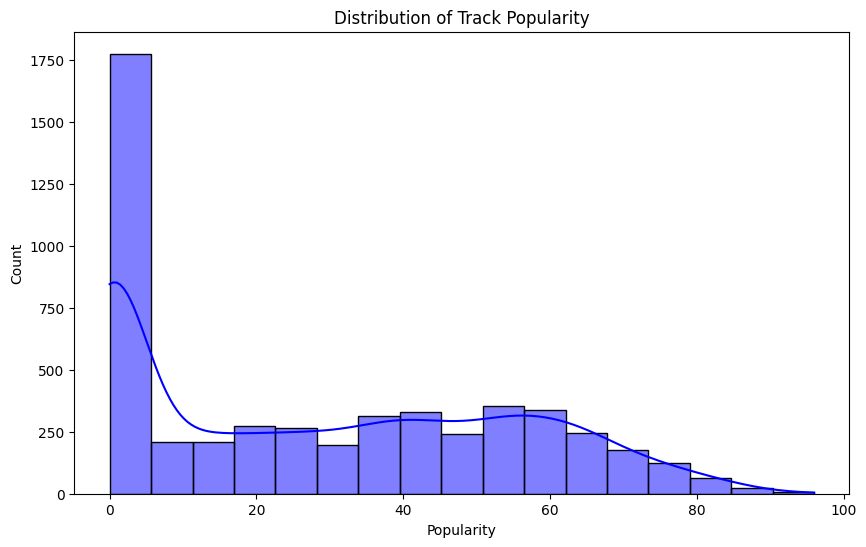

In [177]:
# distribution of the popularity of the tracks
plt.figure(figsize=(10, 6))
sns.histplot(new_df['popularity'], kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

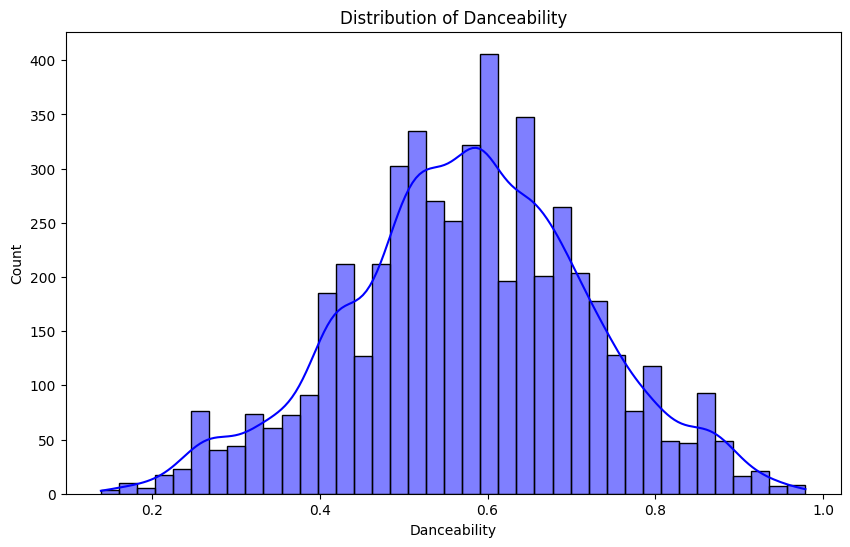

In [178]:
# Distribution of Danceability
plt.figure(figsize=(10, 6))
sns.histplot(new_df['danceability'], kde=True, color='blue')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.show()

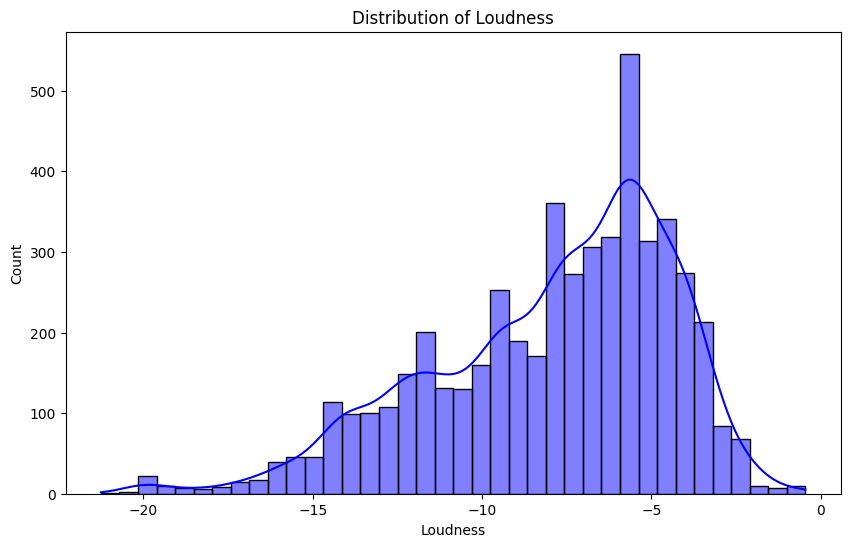

In [179]:
# Distribution of Loudness
plt.figure(figsize=(10, 6))
sns.histplot(new_df['loudness'], kde=True, color='blue')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.show()

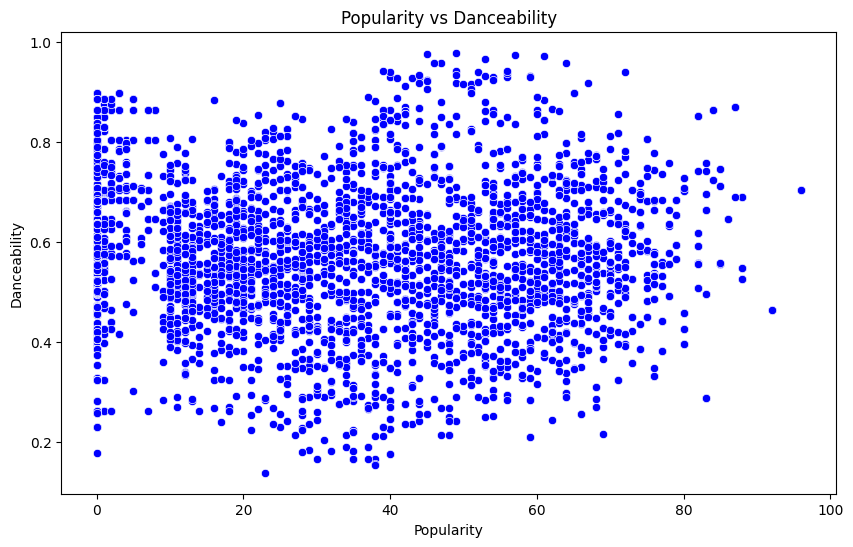

In [180]:
# Popularity vs Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='danceability', data=new_df, color='blue')
plt.title('Popularity vs Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

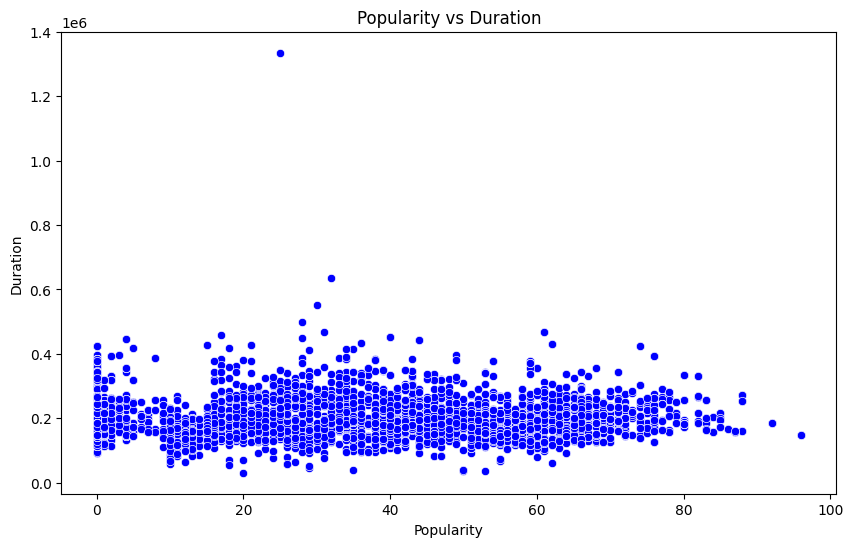

In [181]:
# Popularity vs duration_ms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='duration_ms', data=new_df, color='blue')
plt.title('Popularity vs Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration')
plt.show()

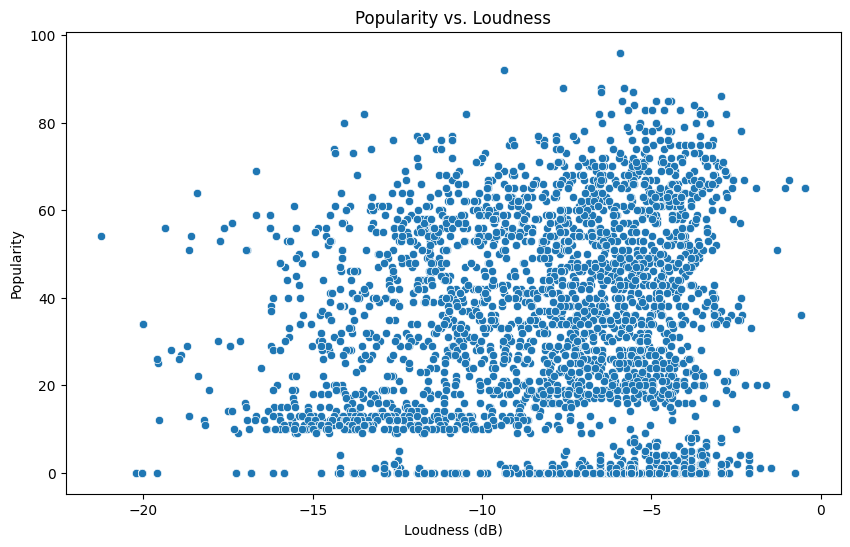

In [182]:
# Popularity vs Loudness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=new_df)
plt.title('Popularity vs. Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.show()


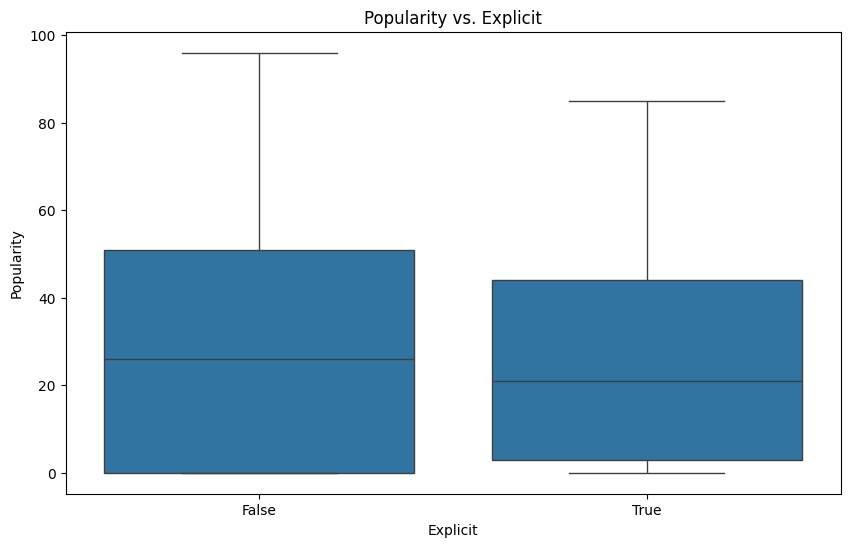

In [183]:
# Popularity vs explicit
plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit', y='popularity', data=new_df)
plt.title('Popularity vs. Explicit')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

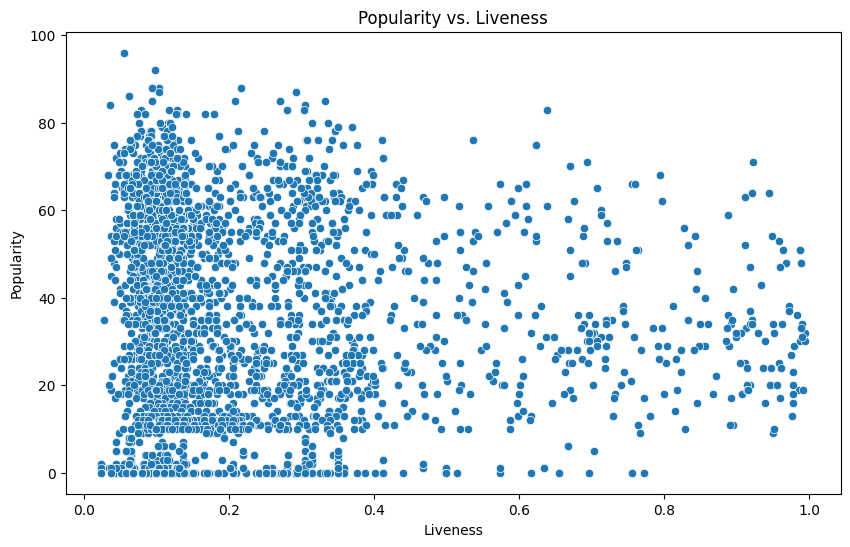

In [184]:
# Popularity vs liveliness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='liveness', y='popularity', data=new_df)
plt.title('Popularity vs. Liveness')
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.show()

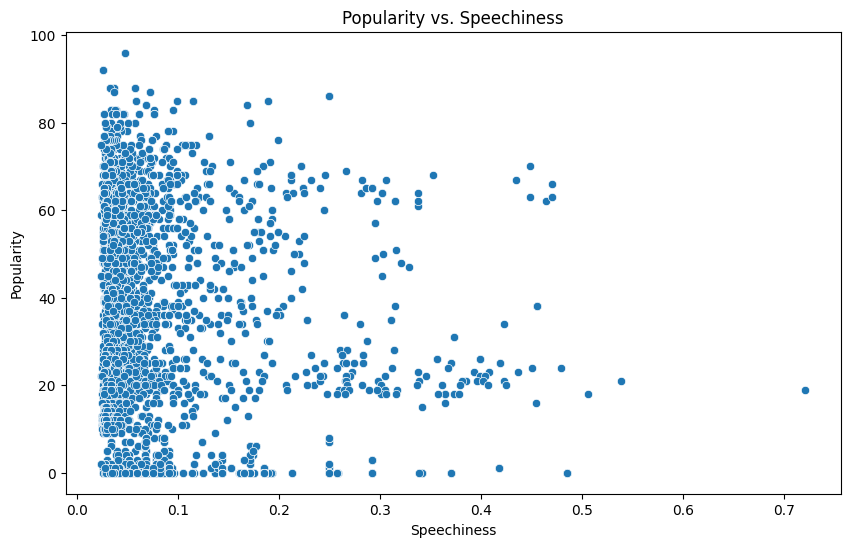

In [185]:
# popularity vs speechiness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speechiness', y='popularity', data=new_df)
plt.title('Popularity vs. Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.show()

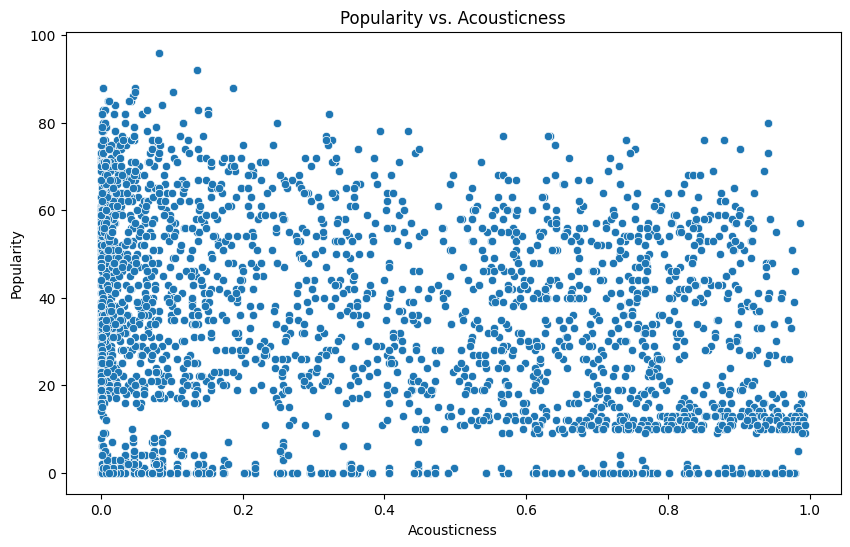

In [186]:
# popularity vs acousticness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='popularity', data=new_df)
plt.title('Popularity vs. Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.show()


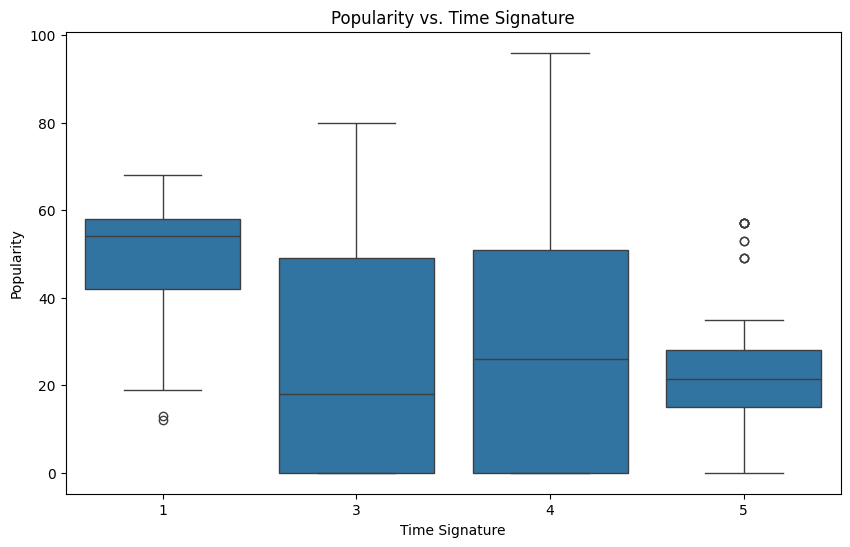

In [187]:
# popularity vs time_signature
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_signature', y='popularity', data=new_df)
plt.title('Popularity vs. Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.show()

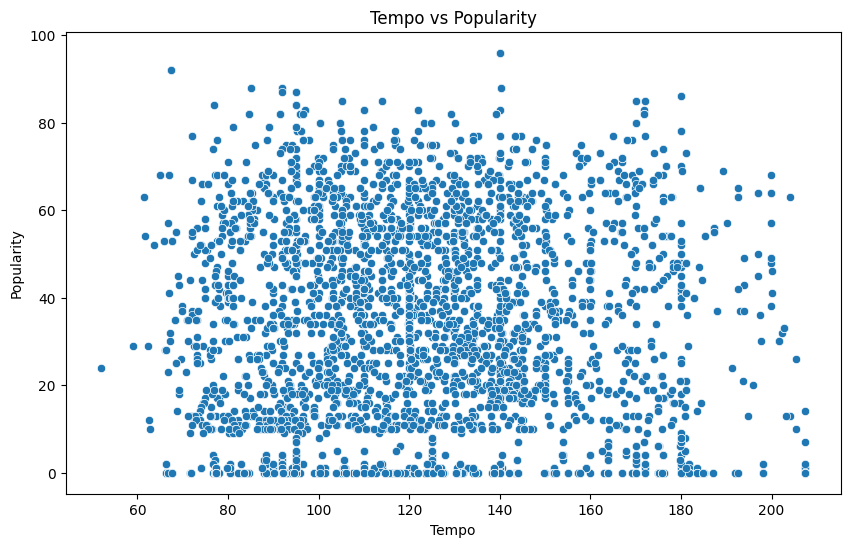

In [188]:
# Tempo vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=new_df)
plt.title('Tempo vs Popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()


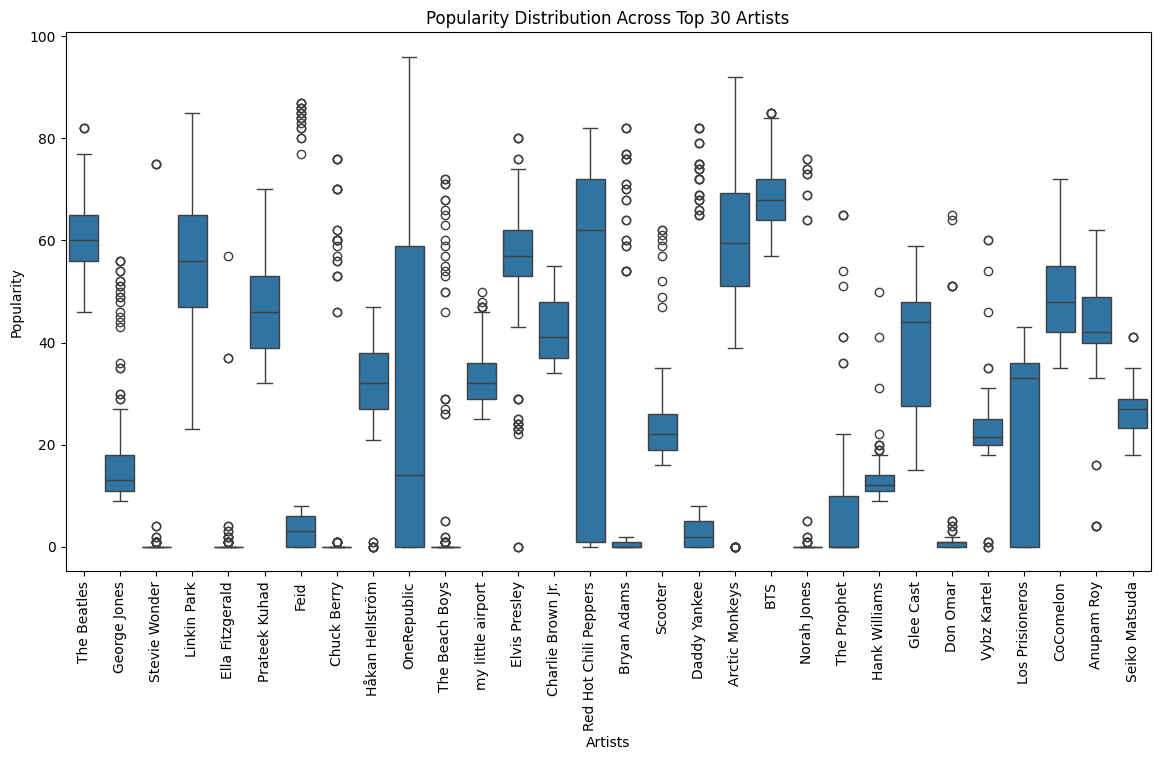

In [189]:
# popularity distribution across the most common artists
plt.figure(figsize=(14, 7))
sns.boxplot(x='artists', y='popularity', data=new_df, order=top_artist)
plt.title('Popularity Distribution Across Top 30 Artists')
plt.xlabel('Artists')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate the artist labels for better readability
plt.show()

<h1> Popularity </h1>


In [190]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and danceability
popularity_danceability_corr, popularity_danceability_p = pearsonr(new_df['popularity'], new_df['danceability'])
print(f'Popularity vs Danceability: correlation={popularity_danceability_corr}, p-value={popularity_danceability_p}')

Popularity vs Danceability: correlation=-0.0644936756131365, p-value=3.669205011703149e-06


In [191]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and loudness
popularity_loudness_corr, popularity_loudness_p = pearsonr(new_df['popularity'], new_df['loudness'])
print(f'Popularity vs Loudness: correlation={popularity_loudness_corr}, p-value={popularity_loudness_p}')

Popularity vs Loudness: correlation=-0.004384392082049986, p-value=0.7532316289017265


In [192]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and duration
popularity_duration_corr, popularity_duration_p = pearsonr(new_df['popularity'], new_df['duration_ms'])
print(f'Popularity vs Duration: correlation={popularity_duration_corr}, p-value={popularity_duration_p}')


Popularity vs Duration: correlation=0.09821118154768001, p-value=1.6742745428060695e-12


In [193]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and explicit
popularity_explicit_corr, popularity_explicit_p = pearsonr(new_df['popularity'], new_df['explicit'])
print(f'Popularity vs Explicit: correlation={popularity_explicit_corr}, p-value={popularity_explicit_p}')


Popularity vs Explicit: correlation=-0.009361548400481446, p-value=0.5020437327864301


In [194]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and liveness
popularity_liveness_corr, popularity_liveness_p = pearsonr(new_df['popularity'], new_df['liveness'])
print(f'Popularity vs Liveness: correlation={popularity_liveness_corr}, p-value={popularity_liveness_p}')

Popularity vs Liveness: correlation=0.040358180169271056, p-value=0.0037911913184423113


In [195]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and speechiness
popularity_speechiness_corr, popularity_speechiness_p = pearsonr(new_df['popularity'], new_df['speechiness'])
print(f'Popularity vs Speechiness: correlation={popularity_speechiness_corr}, p-value={popularity_speechiness_p}')

Popularity vs Speechiness: correlation=-0.06123595813376957, p-value=1.1077101314139469e-05


In [196]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and acousticness
popularity_acousticness_corr, popularity_acousticness_p = pearsonr(new_df['popularity'], new_df['acousticness'])
print(f'Popularity vs Acousticness: correlation={popularity_acousticness_corr}, p-value={popularity_acousticness_p}')

Popularity vs Acousticness: correlation=-0.1578104265150496, p-value=4.8486781779660245e-30


In [197]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and time_signature
popularity_time_signature_corr, popularity_time_signature_p = pearsonr(new_df['popularity'], new_df['time_signature'])
print(f'Popularity vs Time Signature: correlation={popularity_time_signature_corr}, p-value={popularity_time_signature_p}')

Popularity vs Time Signature: correlation=-0.014225358272452695, p-value=0.30769511619343365


In [198]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and tempo
popularity_tempo_corr, popularity_tempo_p = pearsonr(new_df['popularity'], new_df['tempo'])
print(f'Popularity vs Tempo: correlation={popularity_tempo_corr}, p-value={popularity_tempo_p}')

Popularity vs Tempo: correlation=0.03195374060118476, p-value=0.0219169373428737


In [199]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and key
popularity_key_corr, popularity_key_p = pearsonr(new_df['popularity'], new_df['key'])
print(f'Popularity vs Key: correlation={popularity_key_corr}, p-value={popularity_key_p}')


Popularity vs Key: correlation=-0.07583590251618044, p-value=5.1631152683974343e-08


In [200]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and mode
popularity_mode_corr, popularity_mode_p = pearsonr(new_df['popularity'], new_df['mode'])
print(f'Popularity vs Mode: correlation={popularity_mode_corr}, p-value={popularity_mode_p}')


Popularity vs Mode: correlation=-0.06970218200925515, p-value=5.614413752098923e-07


In [201]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and energy
popularity_energy_corr, popularity_energy_p = pearsonr(new_df['popularity'], new_df['energy'])
print(f'Popularity vs Energy: correlation={popularity_energy_corr}, p-value={popularity_energy_p}')

Popularity vs Energy: correlation=0.0622550799705278, p-value=7.88479314921582e-06


In [202]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and instrumentalness
popularity_instrumentalness_corr, popularity_instrumentalness_p = pearsonr(new_df['popularity'], new_df['instrumentalness'])
print(f'Popularity vs Instrumentalness: correlation={popularity_instrumentalness_corr}, p-value={popularity_instrumentalness_p}')

Popularity vs Instrumentalness: correlation=-0.03307775073493423, p-value=0.017669856041933475


In [203]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and valence
popularity_valence_corr, popularity_valence_p = pearsonr(new_df['popularity'], new_df['valence'])
print(f'Popularity vs Valence: correlation={popularity_valence_corr}, p-value={popularity_valence_p}')

Popularity vs Valence: correlation=-0.0827497187903238, p-value=2.7865546759199906e-09


In [204]:
# Calculate the Pearson correlation coefficient and the p-value for the relationship between popularity and tempo
popularity_tempo_corr, popularity_tempo_p = pearsonr(new_df['popularity'], new_df['tempo'])
print(f'Popularity vs Tempo: correlation={popularity_tempo_corr}, p-value={popularity_tempo_p}')

Popularity vs Tempo: correlation=0.03195374060118476, p-value=0.0219169373428737


In [205]:
# Energy and loudness
energency_loudness_corr, energy_loudness_p = pearsonr(new_df['energy'], new_df['loudness'])
print(f'Energy vs Loudness: correlation={energency_loudness_corr}, p-value={energy_loudness_p}')


Energy vs Loudness: correlation=0.7876762725376709, p-value=0.0


Energy vs Loudness is best so far


In [206]:
# Energy and danceability
energy_danceability_corr, energy_danceability_p = pearsonr(new_df['energy'], new_df['danceability'])
print(f'Energy vs Danceability: correlation={energy_danceability_corr}, p-value={energy_danceability_p}')

Energy vs Danceability: correlation=0.10132500689483298, p-value=3.236162057357123e-13


In [207]:
# Energy and valence
energy_valence_corr, energy_valence_p = pearsonr(new_df['energy'], new_df['valence'])
print(f'Energy vs Valence: correlation={energy_valence_corr}, p-value={energy_valence_p}')


Energy vs Valence: correlation=0.21903989402205204, p-value=6.382783040303206e-57


In [208]:
# energy and tempo
energy_tempo_corr, energy_tempo_p = pearsonr(new_df['energy'], new_df['tempo'])
print(f'Energy vs Tempo: correlation={energy_tempo_corr}, p-value={energy_tempo_p}')

Energy vs Tempo: correlation=0.22154867274057222, p-value=3.1839136965928434e-58


In [209]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [210]:
model = LinearRegression()
energy = new_df['energy'].values.reshape(-1, 1)
loudness = new_df['loudness'].values.reshape(-1, 1)
model.fit(energy, loudness)
r_sq = model.score(energy, loudness)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6204339103188397


In [211]:
energy = sm.add_constant(energy)
model = sm.OLS(loudness, energy).fit()
return_model = model.summary()
print(return_model)




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     8405.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:14:23   Log-Likelihood:                -11325.
No. Observations:                5144   AIC:                         2.265e+04
Df Residuals:                    5142   BIC:                         2.267e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0508      0.083   -180.294      0.0